# LAMMPS Tutorials 02 nve. Running your first LAMMPS simulation!

### Author: ABDELLAH TAHIRI 

Please contact me if you have a problem with this tutorial, so I can modify in Github.  I have added FAQs, and will update my versions of LAMMPS in the future to keep the scripts current.

The latest version of this [Jupyter Notebook](http://ipython.org/notebook.html) tutorial is available at https://github.com/athiri78/DM/edit/main/LAMMPS-Tutorials.



***

## Description:
<a id="Sec1"></a>

This script sets up and runs a molecular dynamics simulation of Argon atoms using the LAMMPS software package. Below is a detailed breakdown:

* System Setup (FCC Argon Lattice):
Defines FCC lattice for Argon with a lattice constant of 4.05 Å.
Sets up a simulation box of 10×10×10 unit cells, using periodic boundary conditions in all directions to simulate an infinite system.
Initializes atomic positions and assigns Argon atoms to the box.
* Interatomic Potential:
Uses the Lennard-Jones (LJ) potential with a cutoff distance of 10 Å.
* LJ parameters for Argon:
- ε (epsilon): 0.0103 eV (energy well depth).
- σ (sigma): 3.40 Å (atomic size).
* Energy Minimization:
Performs energy minimization to relax the system and eliminate unphysical overlaps or high-energy configurations before the dynamics simulation.
* Thermodynamic Output:
Specifies thermodynamic properties (e.g., step, potential energy, kinetic energy, total energy, temperature, and pressure) to be printed every 100 timesteps.
* Dump File for Visualization:
Outputs atomic positions to a file (argon.lammpstrj) every 100 timesteps for post-simulation visualization using tools like Ovito.
* Initialization of Velocities:
Assigns initial velocities to atoms corresponding to a temperature of 300 K using a Gaussian distribution, ensuring a randomized but physically consistent starting state.
* Runs a simulation under the NVE ensemble:
NVE conserves the total energy of the system while keeping the number of atoms (N) and volume (V) constant.
Suitable for isolated systems where energy is neither added nor removed.
* Simulation Parameters:
Timestep: 0.001 ps, ensuring accurate integration of the equations of motion.
Number of timesteps: 10,000, corresponding to a total simulation time of 10 ps.
* Post-Simulation Data:
Saves the final configuration of the system to a file (argon_final2.data) for further analysis.




## Step 1: Download an Input File
<a id="Step1"></a>

This input script was run using the Aug 2024 version of LAMMPS. Changes in some commands may require revision of the input script. To get the input file, you have a few options:

*  Copy the text below and paste it into a text file, `nve.in`. Use the `Paste Special` command with unformatted text into the file. 
*  Or, I added the command `%%writefile nve.in` to the Jupyter Notebook which should just do everything for you!




In [4]:
%%writefile nve.in
######################################

# LAMMPS Input Script: FCC Argon Simulation

# ===============================================
# (1) System creation of FCC of ARGON lattice
# ===============================================
units metal                  # Specify units for the simulation
boundary p p p               # Periodic boundary conditions in all directions
atom_style atomic            # Define the atomic style for simple atomic systems

# Create the FCC lattice for Argon
lattice fcc 4.05             # FCC lattice with a lattice constant of 4.05 Å
region box block 0 10 0 10 0 10 units lattice  # Define a simulation box with 10x10x10 unit cells
create_box 1 box             # Create a simulation box for one atom type
create_atoms 1 box           # Populate the box with atoms

# ===============================================
# (2) Specification of potential type and cutoff
# ===============================================
pair_style lj/cut 10.0       # Lennard-Jones potential with a cutoff of 10 Å
pair_coeff 1 1 0.0103 3.40  # Argon parameters: ε = 0.0103 eV, σ = 3.40 Å
mass 1 39.95                 # Mass of Argon atoms (in atomic mass units)

# ===============================================
# (3) Energy minimization
# ===============================================
minimize 1.0e-4 1.0e-6 100 1000  # Energy minimization parameters

# ===============================================
# (4) Printing of coordinate information
# ===============================================
write_data argon_minimized2.data  # Save minimized configuration to a file

# ===============================================
# (5) Printing thermodynamic information
# ===============================================
thermo 100                     # Print thermodynamic info every 100 steps
thermo_style custom step pe ke etotal temp press  # Specify what to print

# ===============================================
# (6) Visualization of coordinates (for tools like Ovito)
# ===============================================
dump 1 all atom 100 argon.lammpstrj  # Output trajectory file for visualization
dump_modify 1 scale yes             # Include scaled coordinates in the dump file

# (3) Initialize velocities to 300 K
# ===============================================
velocity all create 300.0 12345 loop geom  # Set temperature to 300 K with a random seed (12345)


# ===============================================
# (7) NVE dynamics (constant NVE ensemble)
# ===============================================
# Set the simulation to run with NVE ensemble (constant N, V, E)
fix 1 all nve                   # Apply the NVE integration method

# ===============================================
# (8) Run a simulation for a specified number of steps
# ===============================================
timestep 0.001                # Set the timestep to 0.001 ps
run 10000                      # Run the simulation for 10,000 timesteps (change as needed)

# ===============================================
# Post-simulation processing
# ===============================================
variable stp equal 10000
print "The simulation completed ${stp} steps successfully."

# Write the final state of the system to a file
write_data argon_final2.data

# End of Script

Overwriting nve.in


Awesome!  That little script should have written the above text to the file `nve.in`.  To check, let's execute a command on the present directory listing all files that end in `*.in`.

In [7]:
!dir *.in

 Le volume dans le lecteur C n’a pas de nom.
 Le numéro de série du volume est DC02-C1A6

 Répertoire de C:\Users\pc\Desktop\M2A

21/11/2024  10:17             1 774 calc_fcc.in
12/11/2024  14:40             1 565 calc_fcc_ver1.in
09/11/2024  14:10             1 233 calc_fcc_ver2.in
12/11/2024  16:49             1 177 lj.in
12/11/2024  17:08               533 ljbarosta.in
12/11/2024  17:19             1 389 ljovito.in
12/11/2024  18:10             1 018 ljrdf.in
12/11/2024  16:59               522 ljthermo.in
25/11/2024  12:17             2 875 minimization.in
25/11/2024  12:45             3 080 minimization1.in
26/11/2024  15:15             3 352 nve.in
23/11/2024  15:26             3 010 nvt.in
              12 fichier(s)           21 528 octets
               0 Rép(s)  164 434 493 440 octets libres


***
## Step 2: Running LAMMPS
### Run this using LAMMPS in Jupyter Notebook
We can actually run this from Jupyter Notebook.  Let's try it.

In [9]:
!lmp -in nve.in  -pk omp 8 -sf omp 

LAMMPS (29 Aug 2024 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\LAMMPS 64-bit 29Aug2024\plugins
set 8 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Lattice spacing in x,y,z = 4.05 4.05 4.05
Created orthogonal box = (0 0 0) to (40.5 40.5 40.5)
  1 by 1 by 1 MPI processor grid
Created 4000 atoms
  using lattice units in orthogonal box = (0 0 0) to (40.5 40.5 40.5)
  create_atoms CPU = 0.001 seconds
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Last active /omp style is pair_style lj/cut/omp
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 12
  ghost atom cutoff = 12
  binsize = 6, bins = 7 7 7
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut/omp, perpetual
      attributes: half, newton on, omp

Sweet!

If you want to view the entire file (opening `log.lammps` in Notepad), then:

In [10]:
!type log.lammps

LAMMPS (29 Aug 2024 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\LAMMPS 64-bit 29Aug2024\plugins
package omp 8
set 8 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
######################################

# LAMMPS Input Script: FCC Argon Simulation

# ===============================================
# (1) System creation of FCC of ARGON lattice
# ===============================================
units metal                  # Specify units for the simulation
boundary p p p               # Periodic boundary conditions in all directions
atom_style atomic            # Define the atomic style for simple atomic systems

# Create the FCC lattice for Argon
lattice fcc 4.05             # FCC lattice with a lattice constant of 4.05 Ã…
Lattice spacing in x,y,z = 4.05 4.05 4.05
region box block 0 10 0 10 0 10 units lattice  # Define a simulation box with 10x1

## plot the graph with python code 
To plot the graphs for Kinetic Energy (KE) and Potential Energy (PE) as a function of the simulation steps with two different colors (e.g., red and blue), you can use Python and Matplotlib.

In [15]:
# Read LAMMPS log file and extract thermo data

input_log_file = "log.lammps"  # Replace with the actual log file name
output_data_file = "file.data"  # The output data file to be created

# Columns to extract from the log file
columns = ["Step", "PE", "KE", "ETotal", "Temp"]

# Initialize storage for extracted data
data = []

with open(input_log_file, "r") as log:
    capture = False
    for line in log:
        # Detect start of thermo output (header)
        if "Step" in line and "Temp" in line:
            capture = True
            continue
        
        # Stop capturing after thermo ends
        if capture and line.strip() == "":
            capture = False
        
        # Capture thermo data lines
        if capture:
            parts = line.split()
            try:
                # Extract relevant numeric values
                step = int(parts[0])
                pe = float(parts[1])
                ke = float(parts[2])
                etotal = float(parts[3])
                temp = float(parts[4])
                data.append([step, pe, ke, etotal, temp])
            except ValueError:
                # Ignore non-numeric lines
                continue

# Save extracted data to file.data
with open(output_data_file, "w") as output:
    # Write header
    output.write("# Step PE KE ETotal Temp\n")
    # Write data rows
    for row in data:
        output.write(" ".join(map(str, row)) + "\n")

print(f"Thermo data successfully written to {output_data_file}")


Thermo data successfully written to file.data


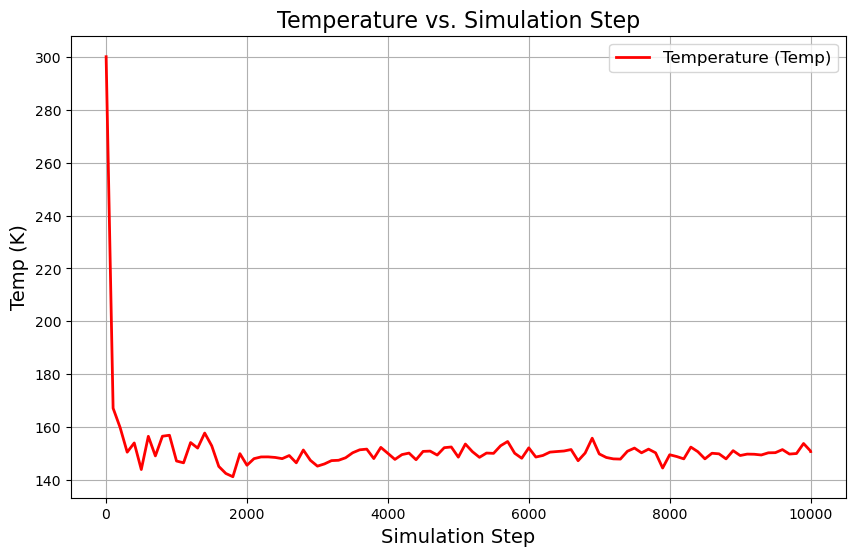

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file.data
input_file = "file.data"  # Replace with the file containing the data
data = np.loadtxt(input_file, comments="#")

# Extract relevant columns: Step, KE, PE
steps = data[:, 0]  # Column 0: Steps
#ke = data[:, 2]     # Column 2: Kinetic Energy (KE)
Temp = data[:, 4]     # Column 1: Potential Energy (PE)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot KE with red line
plt.plot(steps, Temp, color="red", label="Temperature (Temp)", linewidth=2)

# Plot PE with blue line
#plt.plot(steps, pe, color="blue", label="Potential Energy (PE)", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Simulation Step", fontsize=14)
plt.ylabel("Temp (K)", fontsize=14)
plt.title("Temperature vs. Simulation Step", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Save the plot to a file (optional)
#plt.savefig("energy_plot.png", dpi=300)

# Display the plot
plt.show()


In [34]:
## plot the graph with python code 
N.B 


SyntaxError: invalid syntax (957381343.py, line 2)

***
## FAQs 
<br>
<div class="alert alert-danger">

 <strong>Exercice</strong>

Read the provided LAMMPS script carefully.
1) Identify and explain the significance of the following sections in the script:
FCC lattice creation.
Lennard-Jones potential and its parameters.
Energy minimization.
NVE ensemble and its role in the simulation.
Running the Simulation:

2) Use the provided script to run the simulation in LAMMPS. Make sure the necessary input files are in the correct directory.
After the simulation, locate the following output files:
argon_minimized2.data: Contains the minimized atomic coordinates.
argon.lammpstrj: A trajectory file for visualization.
Thermodynamic data (e.g., printed step, potential energy, kinetic energy).
Thermodynamic Analysis:

3) Extract the thermodynamic data printed during the simulation (steps, potential energy, kinetic energy, and total energy).
Verify the conservation of total energy during the simulation.
Data Visualization:

4) Plot the following graphs using the extracted data:
Kinetic Energy (KE) vs. Step (red color).
Potential Energy (PE) vs. Step (blue color).
Analyze how the energies fluctuate and discuss their trends.
Visualization of Atomic Motion:

5) Load the argon.lammpstrj file into a visualization tool such as Ovito.
Observe the motion of Argon atoms during the simulation.
Identify any structural changes in the FCC lattice.
Critical Thinking Questions: Answer the following:

6) Why is energy minimization performed before running the NVE simulation?
Explain how the Lennard-Jones potential contributes to modeling Argon atom interactions.
Discuss the importance of using periodic boundary conditions in the simulation.
* N.B
In an NVE (constant Number, Volume, Energy) simulation, the temperature drop from 300 K to 150 K could result from several physical or simulation-related causes
** Kinetic Energy to Potential Energy Transfer:

The temperature in molecular dynamics simulations is directly proportional to the kinetic energy of the atoms:
$$T = \frac{2 \cdot KE}{3 \cdot k_B}$$
 
kinetic energy decreases (due to conversion into potential energy, e.g., during structural relaxation), the temperature will drop.
Early in the simulation, the system might still be redistributing energy to settle into a stable configuration, especially if energy minimization was imperfect.






***
## Tutorial Links

[Click here to open the next tutorial](LAMMPS-Tutorials-02.ipynb)